# Flower Project 
Using CNN wiht Keras to create a flower recognition model.

In [1]:
# importing tools
import matplotlib.pyplot as plt
import numpy as np
import os 
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
# getting data path
data_dir = os.getcwd()
print(data_dir)

D:\flower-project


In [8]:
print(os.walk(data_dir))

<generator object walk at 0x00000211987EDE40>


## Loading the data

In [12]:
# Setting some variables
BATCH_SIZE = 32
IMG_HEIGHT = 180
IMG_WIDTH = 180

In [13]:
# Loading images from directory
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
        directory='D:\\flower-project\\flowers',
        validation_split=0.2,
        subset="training",
        seed=0,
        image_size=(IMG_HEIGHT,IMG_WIDTH),
        batch_size=BATCH_SIZE)

Found 4323 files belonging to 5 classes.
Using 3459 files for training.


In [14]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [15]:
# Creating a validation set 
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
        directory='D:\\flower-project\\flowers',
        validation_split=0.2,
        subset="validation",
        seed=0,
        image_size=(IMG_HEIGHT,IMG_WIDTH),
        batch_size=BATCH_SIZE)

Found 4323 files belonging to 5 classes.
Using 864 files for validation.


## Visualizing the data

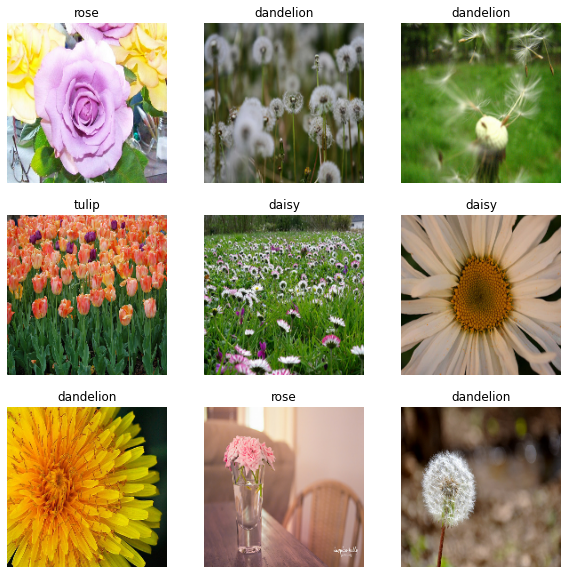

In [18]:
# Showing first 9 images of the dataset
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for images,labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [19]:
# print image batch and label size
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


In [20]:
# create cache for safety reasons
    
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Creating the model

In [21]:
# creating the neural network for the model
num_classes = 5

model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255,input_shape=(IMG_HEIGHT,IMG_WIDTH,3)),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])

In [22]:
# compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

In [24]:
# training the model
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

Epoch 1/10
109/109 [==============================] - 56s 516ms/step - loss: 1.2562 - accuracy: 0.4764 - val_loss: 1.0227 - val_accuracy: 0.5938
Epoch 2/10
109/109 [==============================] - 43s 396ms/step - loss: 0.9542 - accuracy: 0.6247 - val_loss: 0.9349 - val_accuracy: 0.6319
Epoch 3/10
109/109 [==============================] - 45s 413ms/step - loss: 0.7852 - accuracy: 0.6907 - val_loss: 0.8952 - val_accuracy: 0.6516
Epoch 4/10
109/109 [==============================] - 47s 430ms/step - loss: 0.5615 - accuracy: 0.7930 - val_loss: 1.0029 - val_accuracy: 0.6493
Epoch 5/10
109/109 [==============================] - 45s 413ms/step - loss: 0.3351 - accuracy: 0.8812 - val_loss: 1.2179 - val_accuracy: 0.6366
Epoch 6/10
109/109 [==============================] - 45s 417ms/step - loss: 0.1733 - accuracy: 0.9474 - val_loss: 1.4481 - val_accuracy: 0.6296
Epoch 7/10
109/109 [==============================] - 45s 413ms/step - loss: 0.0949 - accuracy: 0.9760 - val_loss: 1.6042 - val_ac

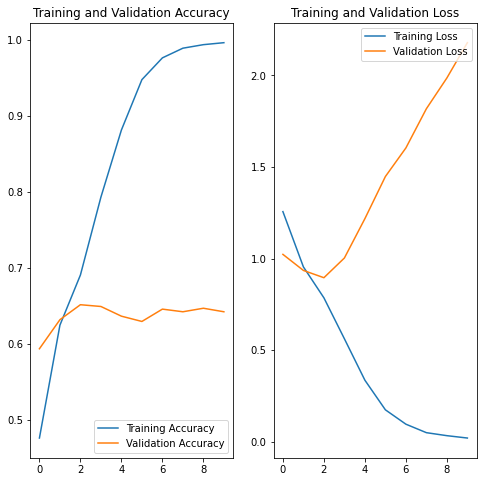

In [26]:
# visualizing training results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

There is a large difference between the training accuracy and validation accuracy, let's use some techniques to avoid overfitting like data augmentation and drop-out.

In [27]:
# Data Augmentation
data_augmentation = keras.Sequential(
[
    layers.experimental.preprocessing.RandomFlip('horizontal',
                                                input_shape=(IMG_HEIGHT,IMG_WIDTH,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

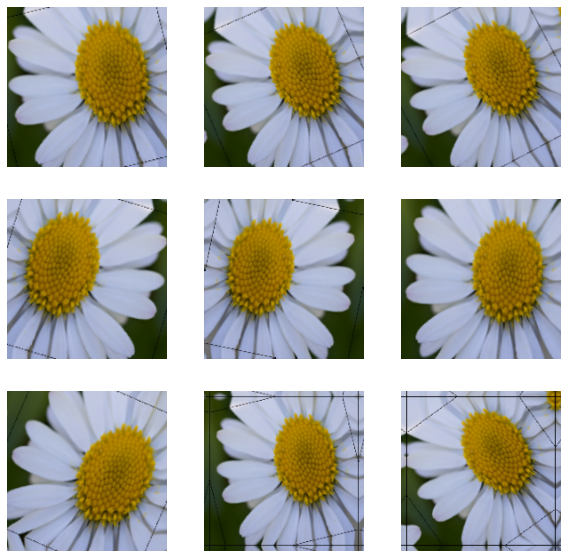

In [30]:
# visualizing augmentation 
plt.figure(figsize=(10,10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3,3,i+1)
        plt.imshow(augmented_images[0].numpy().astype('uint8'))
        plt.axis("off")

We can see that the image is augmented in different ways so that the model can receive different orientations every time a image is put for training.

In [31]:
# make new model using dropout
model = Sequential([
    data_augmentation,
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])

In [32]:
# compile and train the new model
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)       

In [33]:
# training the model
epochs = 15
history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=epochs
)

Epoch 1/15
109/109 [==============================] - 56s 514ms/step - loss: 1.2914 - accuracy: 0.4420 - val_loss: 1.0924 - val_accuracy: 0.5972
Epoch 2/15
109/109 [==============================] - 51s 468ms/step - loss: 1.0659 - accuracy: 0.5765 - val_loss: 1.0092 - val_accuracy: 0.6146
Epoch 3/15
109/109 [==============================] - 51s 465ms/step - loss: 0.9698 - accuracy: 0.6227 - val_loss: 0.9330 - val_accuracy: 0.6493
Epoch 4/15
109/109 [==============================] - 51s 465ms/step - loss: 0.8936 - accuracy: 0.6571 - val_loss: 0.8811 - val_accuracy: 0.6817
Epoch 5/15
109/109 [==============================] - 52s 474ms/step - loss: 0.8197 - accuracy: 0.6857 - val_loss: 0.8017 - val_accuracy: 0.7072
Epoch 6/15
109/109 [==============================] - 53s 485ms/step - loss: 0.7878 - accuracy: 0.6947 - val_loss: 0.7971 - val_accuracy: 0.6991
Epoch 7/15
109/109 [==============================] - 55s 508ms/step - loss: 0.7559 - accuracy: 0.7080 - val_loss: 0.7859 - val_ac

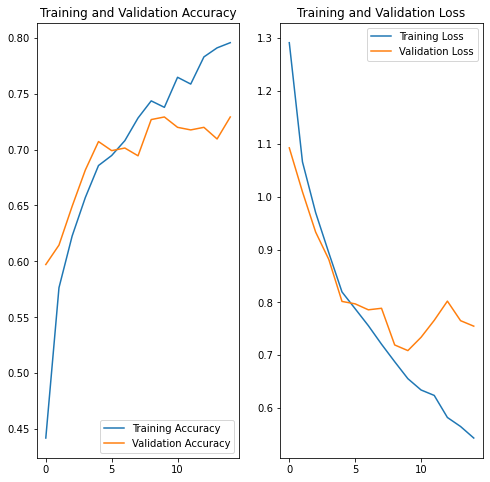

In [35]:
# visualize training results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [36]:
## Testing model on new image
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('red_sunflower',origin=sunflower_url)

img = keras.preprocessing.image.load_img(
    sunflower_path, target_size=(IMG_HEIGHT,IMG_WIDTH)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} % confidence."
    .format(class_names[np.argmax(score)], 100*np.max(score))
)

122880/117948 [===============================] - 0s 2us/step
This image most likely belongs to sunflower with a 99.79 % confidence.
